Создаем 8 входных бинарных векторов

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

v1 = np.array([[1,1,-1,-1],
              [-1,-1,1,1],
              [-1,-1,1,1],
              [1,1,-1,-1]])

v2 = np.array([[1,1,-1,-1],
              [1,1,-1,-1],
              [-1,-1,1,-1],
              [-1,-1,-1,1]])

v3 = np.array([[1,-1,-1,-1],
              [-1,1,-1,-1],
              [-1,-1,1,-1],
              [-1,-1,-1,1]])

v4 = np.array([[1,1,-1,-1],
              [-1,-1,1,1],
              [1,1,-1,-1],
              [-1,-1,1,1]])

v5 = np.array([[1,-1,-1,-1],
              [-1,1,1,-1],
              [-1,1,1,-1],
              [-1,-1,-1,1]])

v6 = np.array([[-1,-1,1,1],
              [-1,-1,1,1],
              [1,1,-1,-1],
              [1,1,-1,-1]])

v7 = np.array([[1,-1,-1,-1],
              [-1,1,1,-1],
              [-1,1,1,1],
              [-1,-1,-1,1]])

v8 = np.array([[1,-1,-1,-1],
              [-1,-1,1,1],
              [-1,-1,1,-1],
              [-1,1,-1,-1]])

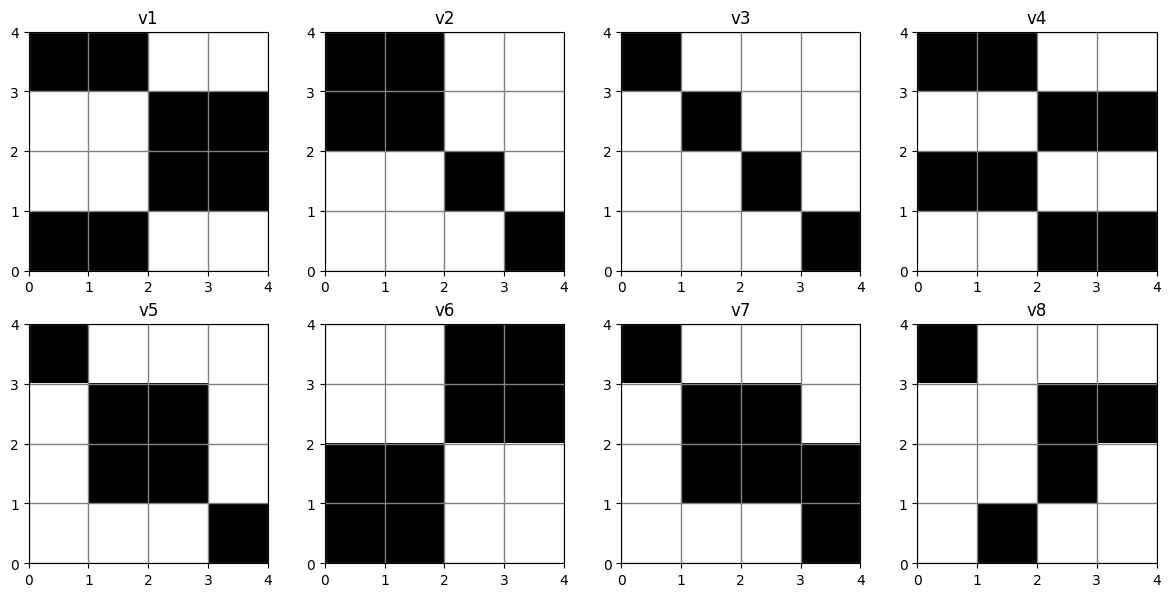

In [ ]:
plt.figure(figsize=(12, 6))
for i, vec in enumerate([v1, v2, v3, v4, v5, v6, v7, v8], 1):
    plt.subplot(2, 4, i)
    plt.imshow(vec, cmap='gray_r', extent=[0, vec.shape[1], 0, vec.shape[0]])
    plt.grid(which='both', color='gray', linestyle='-', linewidth=1)
    plt.xticks(range(vec.shape[1] + 1))
    plt.yticks(range(vec.shape[0] + 1))
    plt.title(f'v{i}')
plt.tight_layout()
plt.show()

In [ ]:
vectors = [v1, v2, v3, v4, v5, v6, v7, v8]

#сжимаем 4x4 матрицы в плоские векторы
flat_vectors = [v.flatten() for v in vectors]

Создаем АРТ-сеть


In [ ]:
# APT-1 сеть
class ARTNetwork:
    def __init__(self, rho=0.8, beta=0.01, vigilance=0.8, max_clusters=8):
        #инициализация параметров сети
        self.rho = rho  #порог совпадения (доля совпадающих битов)
        self.beta = beta  #для обучения
        self.vigilance = vigilance  #для проверки в classify
        self.max_clusters = max_clusters
        self.num_clusters = 0
        self.W = None
        self.labels = []

    def initialize(self, input_size):
        # инициализация весов нулями, заполняем по мере добавления кластеров
        self.W = np.zeros((self.max_clusters, input_size), dtype=int)
        self.labels = np.zeros(self.max_clusters)

    def hamming_similarity(self, x1, x2):
        return np.sum(x1 == x2) / len(x1)

    def train(self, X):
        for i in range(self.num_clusters):
            if self.labels[i] == 0:
                continue
            similarity = self.hamming_similarity(self.W[i], X) #для бинарных сигналов используем сходство Хэмминга
            if similarity >= self.rho:
                return i  # найден подходящий кластер

        # новый кластер
        if self.num_clusters < self.max_clusters:
            self.W[self.num_clusters] = X
            self.labels[self.num_clusters] = 1
            self.num_clusters += 1
            return self.num_clusters - 1

        return -1  # не удалось кластеризовать

    def classify(self, X):
        for i in range(self.num_clusters):
            if self.labels[i] == 0:
                continue
            similarity = self.hamming_similarity(self.W[i], X)
            if similarity >= self.vigilance:
                return i
        return -1


In [ ]:
#обучение сети
network = ARTNetwork(rho=0.6, vigilance=0.1)
network.initialize(flat_vectors[0].shape[0])

cluster_labels = []
for vec in flat_vectors:
    label = network.train(vec)
    cluster_labels.append(label)

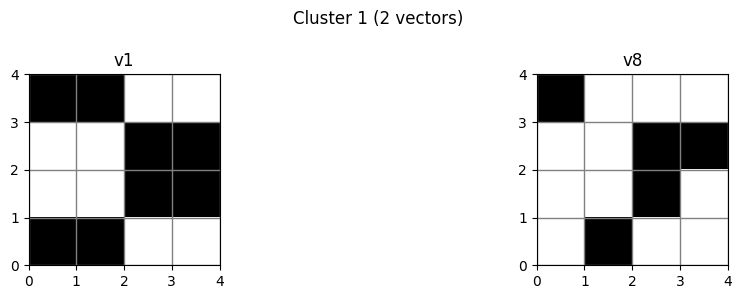

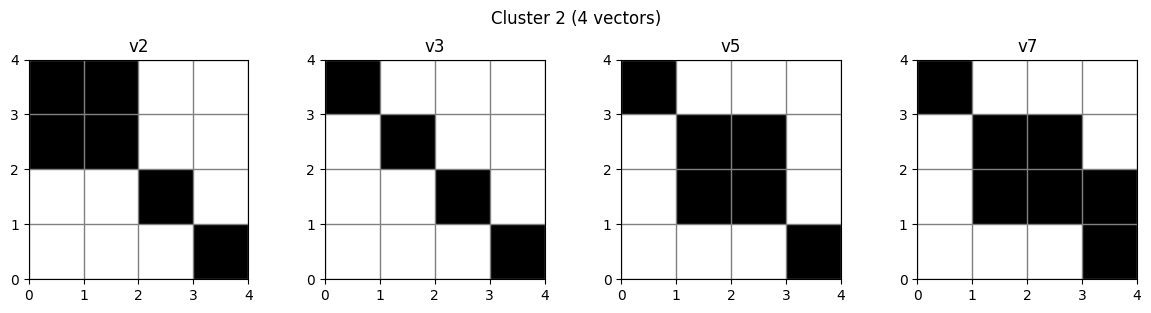

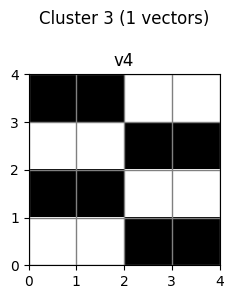

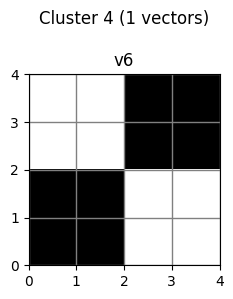

In [ ]:
#визуализация по кластерам
unique_clusters = sorted(set(cluster_labels))
for cluster_id in unique_clusters:
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_title = f"Cluster {cluster_id + 1} ({len(cluster_indices)} vectors)"
    fig, axes = plt.subplots(1, len(cluster_indices), figsize=(12, 3))

    if len(cluster_indices) == 1:
        axes = [axes]

    for ax, idx in zip(axes, cluster_indices):
        vec = vectors[idx]
        ax.imshow(vec, cmap='gray_r', extent=[0, vec.shape[1], 0, vec.shape[0]])
        ax.set_title(f'v{idx + 1}')
        ax.set_xticks(range(vec.shape[1] + 1))
        ax.set_yticks(range(vec.shape[0] + 1))
        ax.grid(which='both', color='gray', linestyle='-', linewidth=1)
        ax.set_xticklabels(range(vec.shape[1] + 1))
        ax.set_yticklabels(range(vec.shape[0] + 1))

    plt.suptitle(cluster_title)
    plt.tight_layout()
    plt.show()